In [72]:
import pandas as pd
import os as csv
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

path1 = '1_county_level_confirmed_cases.csv'
path2 = 'Population_and_Poverty_-_Counties.csv'

csvfile1 = pd.read_csv(path1)
csvfile2 = pd.read_csv(path2)

confirmed_cases = pd.DataFrame(csvfile1)
population_poverty = pd.DataFrame(csvfile2)

In [59]:
confirmed_cases

,last_update,location_type,state,county_name,county_name_long,fips_code,lat,lon,NCHS_urbanization,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000
0,2020-09-23 23:23:49 UTC,county,Alabama,Autauga,"Autauga, Alabama, US",1001.0,32.539527,-86.644082,Medium metro,55200.0,1715,3106.88,25,45.29
1,2020-09-23 23:23:49 UTC,county,Alabama,Baldwin,"Baldwin, Alabama, US",1003.0,30.727750,-87.722071,Small metro,208107.0,5141,2470.36,49,23.55
2,2020-09-23 23:23:49 UTC,county,Alabama,Barbour,"Barbour, Alabama, US",1005.0,31.868263,-85.387129,Non-core,25782.0,851,3300.75,7,27.15
3,2020-09-23 23:23:49 UTC,county,Alabama,Bibb,"Bibb, Alabama, US",1007.0,32.996421,-87.125115,Large fringe metro,22527.0,638,2832.16,10,44.39
4,2020-09-23 23:23:49 UTC,county,Alabama,Blount,"Blount, Alabama, US",1009.0,33.982109,-86.567906,Large fringe metro,57645.0,1580,2740.91,15,26.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3259,2020-09-23 23:23:49 UTC,special_exception,Utah,Central Utah,"Central Utah, Utah, US",NaN,39.372319,-111.575868,NaN,NaN,616,NaN,3,NaN
3260,2020-09-23 23:23:49 UTC,special_exception,Utah,Southeast Utah,"Southeast Utah, Utah, US",NaN,38.996171,-110.701396,NaN,NaN,186,NaN,1,NaN
3261,2020-09-23 23:23:49 UTC,special_exception,Utah,Southwest Utah,"Southwest Utah, Utah, US",NaN,37.854472,-111.441876,NaN,NaN,4067,NaN,30,NaN
3262,2020-09-23 23:23:49 UTC,special_exception,Utah,TriCounty,"TriCounty, Utah, US",NaN,40.124915,-109.517442,NaN,NaN,230,NaN,2,NaN


In [60]:
population_poverty

,OBJECTID,GEO_ID,GEO_NAME,GEO_PARENT_NAME,B17017_002E,B17017_002M,HOUSEBELOWPOVP_CALC,C17002_001E,C17002_001M,C17002_002E,...,DP03_0131PE,DP03_0131PM,DP03_0135PE,DP03_0135PM,DP02_0004E,DP02_0006E,DP02_0006M,DP02_0008E,DP02_0008M,DPO2_0004M
0,1,0500000US01001,Autauga County,Alabama,3175.0,367.0,15.04,54765.0,147.0,3364.0,...,17.7,6.4,8.7,2.4,11988.0,768.0,217.0,2405.0,356.0,495.0
1,2,0500000US01003,Baldwin County,Alabama,8656.0,605.0,11.01,204929.0,494.0,9186.0,...,15.4,3.7,8.0,1.1,41452.0,2422.0,458.0,7485.0,684.0,1207.0
2,3,0500000US01005,Barbour County,Alabama,2383.0,259.0,25.94,22856.0,277.0,2914.0,...,59.9,7.9,16.2,3.4,3908.0,346.0,107.0,1776.0,190.0,237.0
3,4,0500000US01007,Bibb County,Alabama,968.0,214.0,14.15,20468.0,201.0,1207.0,...,14.1,14.5,8.1,3.1,3626.0,387.0,144.0,934.0,237.0,370.0
4,5,0500000US01009,Blount County,Alabama,2944.0,329.0,14.29,57082.0,150.0,4173.0,...,23.9,7.0,10.1,2.1,11942.0,1185.0,254.0,1977.0,290.0,475.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,3216,0500000US72149,Villalba Municipio,Puerto Rico,3735.0,281.0,48.43,22832.0,85.0,5518.0,...,71.5,12.5,43.3,6.2,NaN,NaN,NaN,NaN,NaN,NaN
3216,3217,0500000US72151,Yabucoa Municipio,Puerto Rico,6337.0,486.0,54.06,34052.0,92.0,9838.0,...,67.6,9.6,55.6,5.8,NaN,NaN,NaN,NaN,NaN,NaN
3217,3218,0500000US72153,Yauco Municipio,Puerto Rico,5819.0,336.0,53.93,36216.0,61.0,9844.0,...,59.6,10.6,48.2,4.1,NaN,NaN,NaN,NaN,NaN,NaN
3218,3219,0500000US15005,Kalawao County,Hawaii,4.0,3.0,8.51,66.0,13.0,6.0,...,NaN,NaN,0.0,100.0,8.0,0.0,11.0,0.0,11.0,5.0


In [61]:
population_poverty['county_name'] = population_poverty['GEO_NAME'].str.split(' ', 1, expand=True)[0]
population_poverty

,OBJECTID,GEO_ID,GEO_NAME,GEO_PARENT_NAME,B17017_002E,B17017_002M,HOUSEBELOWPOVP_CALC,C17002_001E,C17002_001M,C17002_002E,...,DP03_0131PM,DP03_0135PE,DP03_0135PM,DP02_0004E,DP02_0006E,DP02_0006M,DP02_0008E,DP02_0008M,DPO2_0004M,county_name
0,1,0500000US01001,Autauga County,Alabama,3175.0,367.0,15.04,54765.0,147.0,3364.0,...,6.4,8.7,2.4,11988.0,768.0,217.0,2405.0,356.0,495.0,Autauga
1,2,0500000US01003,Baldwin County,Alabama,8656.0,605.0,11.01,204929.0,494.0,9186.0,...,3.7,8.0,1.1,41452.0,2422.0,458.0,7485.0,684.0,1207.0,Baldwin
2,3,0500000US01005,Barbour County,Alabama,2383.0,259.0,25.94,22856.0,277.0,2914.0,...,7.9,16.2,3.4,3908.0,346.0,107.0,1776.0,190.0,237.0,Barbour
3,4,0500000US01007,Bibb County,Alabama,968.0,214.0,14.15,20468.0,201.0,1207.0,...,14.5,8.1,3.1,3626.0,387.0,144.0,934.0,237.0,370.0,Bibb
4,5,0500000US01009,Blount County,Alabama,2944.0,329.0,14.29,57082.0,150.0,4173.0,...,7.0,10.1,2.1,11942.0,1185.0,254.0,1977.0,290.0,475.0,Blount
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,3216,0500000US72149,Villalba Municipio,Puerto Rico,3735.0,281.0,48.43,22832.0,85.0,5518.0,...,12.5,43.3,6.2,NaN,NaN,NaN,NaN,NaN,NaN,Villalba
3216,3217,0500000US72151,Yabucoa Municipio,Puerto Rico,6337.0,486.0,54.06,34052.0,92.0,9838.0,...,9.6,55.6,5.8,NaN,NaN,NaN,NaN,NaN,NaN,Yabucoa
3217,3218,0500000US72153,Yauco Municipio,Puerto Rico,5819.0,336.0,53.93,36216.0,61.0,9844.0,...,10.6,48.2,4.1,NaN,NaN,NaN,NaN,NaN,NaN,Yauco
3218,3219,0500000US15005,Kalawao County,Hawaii,4.0,3.0,8.51,66.0,13.0,6.0,...,NaN,0.0,100.0,8.0,0.0,11.0,0.0,11.0,5.0,Kalawao


In [62]:
population_poverty['country'] = 'US'
population_poverty

,OBJECTID,GEO_ID,GEO_NAME,GEO_PARENT_NAME,B17017_002E,B17017_002M,HOUSEBELOWPOVP_CALC,C17002_001E,C17002_001M,C17002_002E,...,DP03_0135PE,DP03_0135PM,DP02_0004E,DP02_0006E,DP02_0006M,DP02_0008E,DP02_0008M,DPO2_0004M,county_name,country
0,1,0500000US01001,Autauga County,Alabama,3175.0,367.0,15.04,54765.0,147.0,3364.0,...,8.7,2.4,11988.0,768.0,217.0,2405.0,356.0,495.0,Autauga,US
1,2,0500000US01003,Baldwin County,Alabama,8656.0,605.0,11.01,204929.0,494.0,9186.0,...,8.0,1.1,41452.0,2422.0,458.0,7485.0,684.0,1207.0,Baldwin,US
2,3,0500000US01005,Barbour County,Alabama,2383.0,259.0,25.94,22856.0,277.0,2914.0,...,16.2,3.4,3908.0,346.0,107.0,1776.0,190.0,237.0,Barbour,US
3,4,0500000US01007,Bibb County,Alabama,968.0,214.0,14.15,20468.0,201.0,1207.0,...,8.1,3.1,3626.0,387.0,144.0,934.0,237.0,370.0,Bibb,US
4,5,0500000US01009,Blount County,Alabama,2944.0,329.0,14.29,57082.0,150.0,4173.0,...,10.1,2.1,11942.0,1185.0,254.0,1977.0,290.0,475.0,Blount,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,3216,0500000US72149,Villalba Municipio,Puerto Rico,3735.0,281.0,48.43,22832.0,85.0,5518.0,...,43.3,6.2,NaN,NaN,NaN,NaN,NaN,NaN,Villalba,US
3216,3217,0500000US72151,Yabucoa Municipio,Puerto Rico,6337.0,486.0,54.06,34052.0,92.0,9838.0,...,55.6,5.8,NaN,NaN,NaN,NaN,NaN,NaN,Yabucoa,US
3217,3218,0500000US72153,Yauco Municipio,Puerto Rico,5819.0,336.0,53.93,36216.0,61.0,9844.0,...,48.2,4.1,NaN,NaN,NaN,NaN,NaN,NaN,Yauco,US
3218,3219,0500000US15005,Kalawao County,Hawaii,4.0,3.0,8.51,66.0,13.0,6.0,...,0.0,100.0,8.0,0.0,11.0,0.0,11.0,5.0,Kalawao,US


In [63]:
population_poverty['county_name_long'] = population_poverty['county_name'] + ', ' + population_poverty['GEO_PARENT_NAME'] + ', ' + population_poverty['country']
population_poverty

,OBJECTID,GEO_ID,GEO_NAME,GEO_PARENT_NAME,B17017_002E,B17017_002M,HOUSEBELOWPOVP_CALC,C17002_001E,C17002_001M,C17002_002E,...,DP03_0135PM,DP02_0004E,DP02_0006E,DP02_0006M,DP02_0008E,DP02_0008M,DPO2_0004M,county_name,country,county_name_long
0,1,0500000US01001,Autauga County,Alabama,3175.0,367.0,15.04,54765.0,147.0,3364.0,...,2.4,11988.0,768.0,217.0,2405.0,356.0,495.0,Autauga,US,"Autauga, Alabama, US"
1,2,0500000US01003,Baldwin County,Alabama,8656.0,605.0,11.01,204929.0,494.0,9186.0,...,1.1,41452.0,2422.0,458.0,7485.0,684.0,1207.0,Baldwin,US,"Baldwin, Alabama, US"
2,3,0500000US01005,Barbour County,Alabama,2383.0,259.0,25.94,22856.0,277.0,2914.0,...,3.4,3908.0,346.0,107.0,1776.0,190.0,237.0,Barbour,US,"Barbour, Alabama, US"
3,4,0500000US01007,Bibb County,Alabama,968.0,214.0,14.15,20468.0,201.0,1207.0,...,3.1,3626.0,387.0,144.0,934.0,237.0,370.0,Bibb,US,"Bibb, Alabama, US"
4,5,0500000US01009,Blount County,Alabama,2944.0,329.0,14.29,57082.0,150.0,4173.0,...,2.1,11942.0,1185.0,254.0,1977.0,290.0,475.0,Blount,US,"Blount, Alabama, US"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,3216,0500000US72149,Villalba Municipio,Puerto Rico,3735.0,281.0,48.43,22832.0,85.0,5518.0,...,6.2,NaN,NaN,NaN,NaN,NaN,NaN,Villalba,US,"Villalba, Puerto Rico, US"
3216,3217,0500000US72151,Yabucoa Municipio,Puerto Rico,6337.0,486.0,54.06,34052.0,92.0,9838.0,...,5.8,NaN,NaN,NaN,NaN,NaN,NaN,Yabucoa,US,"Yabucoa, Puerto Rico, US"
3217,3218,0500000US72153,Yauco Municipio,Puerto Rico,5819.0,336.0,53.93,36216.0,61.0,9844.0,...,4.1,NaN,NaN,NaN,NaN,NaN,NaN,Yauco,US,"Yauco, Puerto Rico, US"
3218,3219,0500000US15005,Kalawao County,Hawaii,4.0,3.0,8.51,66.0,13.0,6.0,...,100.0,8.0,0.0,11.0,0.0,11.0,5.0,Kalawao,US,"Kalawao, Hawaii, US"


In [64]:
population_poverty = population_poverty.loc[:, ['county_name_long', 'HOUSEBELOWPOVP_CALC']]
population_poverty

,county_name_long,HOUSEBELOWPOVP_CALC
0,"Autauga, Alabama, US",15.04
1,"Baldwin, Alabama, US",11.01
2,"Barbour, Alabama, US",25.94
3,"Bibb, Alabama, US",14.15
4,"Blount, Alabama, US",14.29
...,...,...
3215,"Villalba, Puerto Rico, US",48.43
3216,"Yabucoa, Puerto Rico, US",54.06
3217,"Yauco, Puerto Rico, US",53.93
3218,"Kalawao, Hawaii, US",8.51


In [65]:
merged_data = pd.merge(confirmed_cases, population_poverty, on='county_name_long', how='inner')
merged_data.head()

,last_update,location_type,state,county_name,county_name_long,fips_code,lat,lon,NCHS_urbanization,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000,HOUSEBELOWPOVP_CALC
0,2020-09-23 23:23:49 UTC,county,Alabama,Autauga,"Autauga, Alabama, US",1001.0,32.539527,-86.644082,Medium metro,55200.0,1715,3106.88,25,45.29,15.04
1,2020-09-23 23:23:49 UTC,county,Alabama,Baldwin,"Baldwin, Alabama, US",1003.0,30.727750,-87.722071,Small metro,208107.0,5141,2470.36,49,23.55,11.01
2,2020-09-23 23:23:49 UTC,county,Alabama,Barbour,"Barbour, Alabama, US",1005.0,31.868263,-85.387129,Non-core,25782.0,851,3300.75,7,27.15,25.94
3,2020-09-23 23:23:49 UTC,county,Alabama,Bibb,"Bibb, Alabama, US",1007.0,32.996421,-87.125115,Large fringe metro,22527.0,638,2832.16,10,44.39,14.15
4,2020-09-23 23:23:49 UTC,county,Alabama,Blount,"Blount, Alabama, US",1009.0,33.982109,-86.567906,Large fringe metro,57645.0,1580,2740.91,15,26.02,14.29


In [33]:
merged_data.to_csv('confirmed_cases-population_poverty.csv', index=False)

Text(30, 10000, 'y = 42.52x + 1121.18')

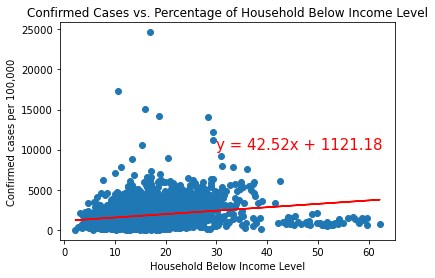

In [77]:
plt.scatter(merged_data['HOUSEBELOWPOVP_CALC'], merged_data['confirmed_per_100000'])
plt.title("Confirmed Cases vs. Percentage of Household Below Income Level")
plt.xlabel("Household Below Income Level")
plt.ylabel("Confirmed cases per 100,000")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(merged_data['HOUSEBELOWPOVP_CALC'], 
                                                           merged_data['confirmed_per_100000'])
regress_value = merged_data['HOUSEBELOWPOVP_CALC'] * slope + intercept
plt.plot(merged_data['HOUSEBELOWPOVP_CALC'], regress_value, 'r-')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(30, 10000),fontsize=15,color="red")

Text(30, 600, 'y = 1.43x + 17.73')

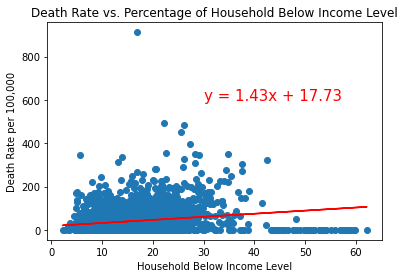

In [79]:
plt.scatter(merged_data['HOUSEBELOWPOVP_CALC'], merged_data['deaths_per_100000'])
plt.title("Death Rate vs. Percentage of Household Below Income Level")
plt.xlabel("Household Below Income Level")
plt.ylabel("Death Rate per 100,000")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(merged_data['HOUSEBELOWPOVP_CALC'], 
                                                           merged_data['deaths_per_100000'])
regress_value = merged_data['HOUSEBELOWPOVP_CALC'] * slope + intercept
plt.plot(merged_data['HOUSEBELOWPOVP_CALC'], regress_value, 'r-')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(30, 600),fontsize=15,color="red")

Text(30, 10000, 'y = 0.0x + 1755.48')

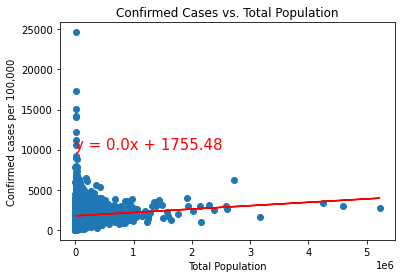

In [82]:
plt.scatter(merged_data['total_population'], merged_data['confirmed_per_100000'])
plt.title("Confirmed Cases vs. Total Population")
plt.xlabel("Total Population")
plt.ylabel("Confirmed cases per 100,000")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(merged_data['total_population'], 
                                                           merged_data['confirmed_per_100000'])
regress_value = merged_data['total_population'] * slope + intercept
plt.plot(merged_data['total_population'], regress_value, 'r-')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(30, 10000),fontsize=15,color="red")

Text(30, 600, 'y = 0.0x + 37.57')

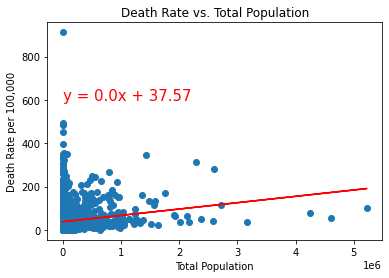

In [84]:
plt.scatter(merged_data['total_population'], merged_data['deaths_per_100000'])
plt.title("Death Rate vs. Total Population")
plt.xlabel("Total Population")
plt.ylabel("Death Rate per 100,000")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(merged_data['total_population'], 
                                                           merged_data['deaths_per_100000'])
regress_value = merged_data['total_population'] * slope + intercept
plt.plot(merged_data['total_population'], regress_value, 'r-')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(30, 600),fontsize=15,color="red")

In [56]:
merged_data['county_name_long'].value_counts()

Fairfax, Virginia, US      2
Lake, Minnesota, US        2
Green, Wisconsin, US       2
Baltimore, Maryland, US    2
Roanoke, Virginia, US      2
                          ..
Republic, Kansas, US       1
Eureka, Nevada, US         1
Wythe, Virginia, US        1
Martin, Indiana, US        1
Madison, Virginia, US      1
Name: county_name_long, Length: 2961, dtype: int64

In [37]:
# merged_data.groupby('county_name_long', as_index=False).mean()
# df[~df.duplicated(subset=['country_name', 'category'])].groupby('country_name').transform('mean').join(df[['country_name', 'category']][~df.duplicated(subset=['country_name', 'category'])])
# merged_data.duplicated(['county_name_long']).groupby('county_name_long')
# merged_data .transform(mean)

KeyError: 'county_name_long'

In [51]:
new_data = merged_data.loc[merged_data.duplicated(['county_name_long'])]
new_data

,last_update,location_type,state,county_name,county_name_long,fips_code,lat,lon,NCHS_urbanization,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000,HOUSEBELOWPOVP_CALC
1065,2020-09-23 23:23:49 UTC,county,Louisiana,Jefferson,"Jefferson, Louisiana, US",22051.0,29.740755,-90.111158,Large fringe metro,435300.0,17386,3994.03,565,129.80,20.80
1107,2020-09-23 23:23:49 UTC,county,Maryland,Baltimore,"Baltimore, Maryland, US",24005.0,39.457847,-76.629120,Large fringe metro,827625.0,17579,2124.03,621,75.03,20.45
1249,2020-09-23 23:23:49 UTC,county,Minnesota,Lake,"Lake, Minnesota, US",27075.0,47.642708,-91.445580,Non-core,10569.0,57,539.31,0,0.00,7.76
1324,2020-09-23 23:23:49 UTC,county,Mississippi,Jefferson,"Jefferson, Mississippi, US",28063.0,31.733979,-91.037650,Non-core,7346.0,244,3321.54,9,122.52,30.65
2709,2020-09-23 23:23:49 UTC,county,Virginia,Fairfax,"Fairfax, Virginia, US",51059.0,38.836776,-77.275658,Large fringe metro,1143529.0,20437,1787.19,583,50.98,8.91
2714,2020-09-23 23:23:49 UTC,county,Virginia,Franklin,"Franklin, Virginia, US",51067.0,36.995362,-79.880236,Medium metro,56233.0,194,344.99,1,1.78,15.85
2741,2020-09-23 23:23:49 UTC,county,Virginia,Manassas,"Manassas, Virginia, US",51683.0,38.746432,-77.485099,Large fringe metro,41457.0,1904,4592.71,25,60.30,7.18
2765,2020-09-23 23:23:49 UTC,county,Virginia,Richmond,"Richmond, Virginia, US",51159.0,37.937575,-76.729206,Non-core,8878.0,341,3840.96,4,45.06,20.60
2767,2020-09-23 23:23:49 UTC,county,Virginia,Roanoke,"Roanoke, Virginia, US",51161.0,37.268658,-80.063968,Medium metro,93583.0,806,861.27,7,7.48,20.26
2903,2020-09-23 23:23:49 UTC,county,Wisconsin,Green,"Green, Wisconsin, US",55045.0,42.679496,-89.602433,Medium metro,36864.0,458,1242.40,2,5.43,10.45


In [52]:
new_data.shape

(10, 15)

In [55]:
new_data.groupby('county_name_long', as_index=False).mean()

,county_name_long,fips_code,lat,lon,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000,HOUSEBELOWPOVP_CALC
0,"Baltimore, Maryland, US",24005.0,39.457847,-76.629120,827625.0,17579,2124.03,621,75.03,20.45
1,"Fairfax, Virginia, US",51059.0,38.836776,-77.275658,1143529.0,20437,1787.19,583,50.98,8.91
2,"Franklin, Virginia, US",51067.0,36.995362,-79.880236,56233.0,194,344.99,1,1.78,15.85
3,"Green, Wisconsin, US",55045.0,42.679496,-89.602433,36864.0,458,1242.40,2,5.43,10.45
4,"Jefferson, Louisiana, US",22051.0,29.740755,-90.111158,435300.0,17386,3994.03,565,129.80,20.80
5,"Jefferson, Mississippi, US",28063.0,31.733979,-91.037650,7346.0,244,3321.54,9,122.52,30.65
6,"Lake, Minnesota, US",27075.0,47.642708,-91.445580,10569.0,57,539.31,0,0.00,7.76
7,"Manassas, Virginia, US",51683.0,38.746432,-77.485099,41457.0,1904,4592.71,25,60.30,7.18
8,"Richmond, Virginia, US",51159.0,37.937575,-76.729206,8878.0,341,3840.96,4,45.06,20.60
9,"Roanoke, Virginia, US",51161.0,37.268658,-80.063968,93583.0,806,861.27,7,7.48,20.26


In [25]:
# merged_data['county_name_long'].value_counts()

Fairfax, Virginia, US      2
Lake, Minnesota, US        2
Green, Wisconsin, US       2
Baltimore, Maryland, US    2
Roanoke, Virginia, US      2
                          ..
Republic, Kansas, US       1
Eureka, Nevada, US         1
Wythe, Virginia, US        1
Martin, Indiana, US        1
Madison, Virginia, US      1
Name: county_name_long, Length: 2961, dtype: int64